In [1]:
%pip install biopython



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /home/naushin_parveen/.local/share/pipx/venvs/notebook/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from Bio import Entrez, SeqIO
print("Biopython import OK")


Biopython import OK


In [2]:
from Bio import Entrez, SeqIO
Entrez.email = "naushin.mansuri@iitgn.ac.in"
query = "globin[Protein Name] NOT partial[Title] NOT fragment[Title]"
handle = Entrez.esearch(db="protein", term=query, retmax=200)
record = Entrez.read(handle)
handle.close()
print("IDs Found:", len(record["IdList"]))
ids = record["IdList"]
handle = Entrez.efetch(db="protein", id=",".join(ids), rettype="fasta", retmode="text")
sequence_data = handle.read()
handle.close()
print("\nSample Output (first 400 characters):\n")
print(sequence_data[:400])
with open("globin_sequences_raw.fasta", "w") as file:
    file.write(sequence_data)
print("\nSaved all sequences to 'globin_sequences_raw.fasta'")

IDs Found: 200

Sample Output (first 400 characters):

>WP_447037499.1 globin [Streptomyces sp. DSM 118878]
MDSVKEIPHGTVQEQTYYEQVGGEETFRRLVHLFYQGVAEDPLLRPMYPEGDLGPAEERFALFLMQYWGG
PRTYSDNRGHPRLRMRHAPFTVDRAAHDAWLKHMRAAVDQLGLSEEHERTLWNYLTYAAASMVNSEG

>WP_447029335.1 globin [Streptomyces hypolithicus]
MNEIPIGTLQEQTFYEQVGGEETFRRLVHRFYQGVAEDPLLKPMYPEEDLGPAEERLALFLMQYWGGPRT
YSDERGHPRLRMRHAPFTVDKAAHDAWLQHMRVAVDELGLSEDHERQLWNYLTYAAASMVNKTG

>WP_447006119.1 glo

Saved all sequences to 'globin_sequences_raw.fasta'


In [4]:
from Bio import SeqIO
print("Total sequences in file:", sum(1 for _ in SeqIO.parse("globin_sequences_raw.fasta","fasta")))
rec = next(SeqIO.parse("globin_sequences_raw.fasta","fasta"))
print("First ID:", rec.id, "Length:", len(rec.seq))


Total sequences in file: 200
First ID: WP_447037499.1 Length: 137


In [4]:
from Bio import SeqIO
lengths = [len(r.seq) for r in SeqIO.parse("globin_sequences_raw.fasta","fasta")]
print("Total sequences:", len(lengths))
print("Shortest:", min(lengths))
print("Longest:", max(lengths))
print("Example lengths:", lengths[:10])

Total sequences: 200
Shortest: 53
Longest: 166
Example lengths: [137, 134, 128, 154, 133, 139, 139, 139, 139, 130]


In [5]:
from Bio import SeqIO

input_file = "globin_sequences_raw.fasta"
output_file = "globin_sequences_filtered.fasta"

filtered_sequences = []

for record in SeqIO.parse(input_file, "fasta"):
    if len(record.seq) >= 100:
        filtered_sequences.append(record)

SeqIO.write(filtered_sequences, output_file, "fasta")

print("Total sequences after filtering:", len(filtered_sequences))
print("Saved filtered sequences to 'globin_sequences_filtered.fasta'")


Total sequences after filtering: 196
Saved filtered sequences to 'globin_sequences_filtered.fasta'


In [6]:
mv -f globin_sequences_filtered.fasta final_globin_sequences.fasta


In [7]:
from Bio import SeqIO
count = sum(1 for _ in SeqIO.parse("final_globin_sequences.fasta","fasta"))
print("Total sequences in final file:", count)


Total sequences in final file: 196


In [8]:
%pip install matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /home/naushin_parveen/.local/share/pipx/venvs/notebook/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
from Bio import SeqIO
import matplotlib.pyplot as plt

input_file = "final_globin_sequences.fasta"


In [11]:
##Collect IDs and lengths
lengths = []
ids = []

for record in SeqIO.parse(input_file, "fasta"):
    ids.append(record.id)
    lengths.append(len(record.seq))

#Save ID + length
with open("sequence_id_length.txt", "w") as f:
    for seq_id, length in zip(ids, lengths):
        f.write(f"{seq_id}\t{length}\n")

In [12]:
import os

print("File exists:", os.path.exists("sequence_id_length.txt"))


File exists: True


In [13]:
with open("sequence_id_length.txt") as f:
    for i in range(10):
        print(f.readline().strip())


WP_447037499.1	137
WP_447029335.1	134
WP_447006119.1	128
WP_446888964.1	154
YBV26126.1	133
YBV21917.1	139
YBV18343.1	139
YBV09626.1	139
YBV14740.1	139
BGO70610.1	130


In [14]:
##summary
print("Total sequences:", len(lengths))
print("Minimum length:", min(lengths))
print("Maximum length:", max(lengths))
print("First 10 lengths (sorted):", sorted(lengths)[:10])

Total sequences: 196
Minimum length: 100
Maximum length: 166
First 10 lengths (sorted): [100, 126, 128, 129, 129, 129, 130, 130, 130, 130]


In [16]:
plt.savefig("sequence_length_histogram.png", dpi=300)


<Figure size 640x480 with 0 Axes>

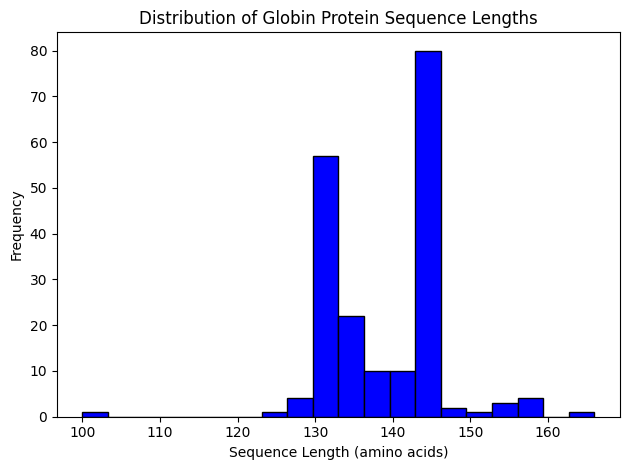

Saved histogram to length_distribution.png


In [25]:
##Plot histogram
plt.hist(lengths, bins=20, edgecolor='black', color='blue')
plt.title("Distribution of Globin Protein Sequence Lengths")
plt.xlabel("Sequence Length (amino acids)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
outpng = "length_distribution.png"
fig.savefig(outpng, dpi=300)
print("Saved histogram to", outpng)

In [26]:
import os
print(os.path.exists("length_distribution.png"))


True


In [30]:
for org in organisms:
    for r in records:
        if org.lower() in r.description.lower():
            outfile = org.replace(" ", "_") + ".fasta"
            SeqIO.write(r, outfile, "fasta")
            print("Saved:", outfile)
            break


Saved: Bacillus.fasta


In [37]:
from Bio import SeqIO

records = list(SeqIO.parse("final_globin_sequences.fasta", "fasta"))

organisms = [
    "Streptomyces hypolithicus",
    "Saccharothrix isguenensis",
    "Pseudoalteromonas sp. SaAl2",
    "Sphingomonas sp. CJ20",
    "Leptospira interrogans",
    "Gordonia sp. J1A",
    "Azospira sp. I13",
    "Sphingopyxis sp.",
    "Streptomyces spiroverticillatus",
    "Pseudomonas aeruginosa"
]

counter = 1   # start numbering files

for org in organisms:
    for r in records:
        if org.lower() in r.description.lower():
            outfile = f"{counter}_" + org.replace(" ", "_") + ".fasta"
            SeqIO.write(r, outfile, "fasta")
            print("Saved:", outfile)
            counter += 1   # increase number after saving
            break


Saved: 1_Streptomyces_hypolithicus.fasta
Saved: 2_Saccharothrix_isguenensis.fasta
Saved: 3_Pseudoalteromonas_sp._SaAl2.fasta
Saved: 4_Sphingomonas_sp._CJ20.fasta
Saved: 5_Leptospira_interrogans.fasta
Saved: 6_Gordonia_sp._J1A.fasta
Saved: 7_Azospira_sp._I13.fasta
Saved: 8_Sphingopyxis_sp..fasta
Saved: 9_Streptomyces_spiroverticillatus.fasta
Saved: 10_Pseudomonas_aeruginosa.fasta


In [2]:
# Cell 1: checks and paths
import shutil, subprocess, sys
from pathlib import Path

# EDIT if your fasta has a different name or location
fasta_in = "combined_sequences.fasta"     # <-- your 10-sequence FASTA
align_out = "sequences_aligned.fasta"
clustal_out = "sequences_aligned.clustal"
tree_out = "sequences_tree.dnd"

print("Current working directory:", Path.cwd())
print("Project PDF (uploaded): /mnt/data/Project_assignment2.pdf\n")

# check fasta exists
if not Path(fasta_in).exists():
    print(f"ERROR: Input FASTA not found at: {fasta_in}")
    raise SystemExit("Place your combined FASTA in the notebook folder or update fasta_in path.")

# check clustalo on PATH
clustalo_path = shutil.which("clustalo")
if clustalo_path:
    print("clustalo found at:", clustalo_path)
    try:
        out = subprocess.run(["clustalo", "--version"], capture_output=True, text=True, check=True)
        ver = out.stdout.strip() or out.stderr.strip()
        print("clustalo version info:", ver)
    except subprocess.CalledProcessError:
        print("clustalo exists but version query failed; may still run.")
else:
    print("clustalo NOT found in PATH.")
    print("Install and start Jupyter from the same conda env, for example:")
    print("  conda activate MSA")
    print("  conda install -c bioconda clustalo")
    print("  jupyter notebook")
    raise SystemExit("Install clustalo in the env you run Jupyter from, then restart notebook.")


Current working directory: /home/naushin_parveen
Project PDF (uploaded): /mnt/data/Project_assignment2.pdf

clustalo found at: /home/naushin_parveen/miniconda3/bin/clustalo
clustalo version info: 1.2.3


In [3]:
# Cell 2: run clustalo to produce aligned FASTA and guide-tree
import subprocess
from pathlib import Path

cmd = [
    "clustalo",
    "-i", fasta_in,
    "-o", align_out,
    "--guidetree-out", tree_out,
    "--outfmt=fasta",
    "--force"
]

print("Running Clustal Omega:")
print(" ".join(cmd))
try:
    proc = subprocess.run(cmd, check=True, capture_output=True, text=True)
    print("Clustal Omega finished (returncode=0).")
    if proc.stdout:
        print("STDOUT snippet:", proc.stdout[:600])
    if proc.stderr:
        # some versions print version/info to stderr
        print("STDERR snippet:", proc.stderr[:600])
    # sanity: confirm files created
    print("\nOutput files created:")
    for p in (align_out, tree_out):
        print(" -", Path(p).resolve(), "(exists)" if Path(p).exists() else "(missing)")
except FileNotFoundError:
    print("ERROR: clustalo executable not found. Please install and restart Jupyter from that conda env.")
    raise
except subprocess.CalledProcessError as e:
    print("clustalo failed. Return code:", e.returncode)
    print("stdout (head):", e.stdout[:1000])
    print("stderr (head):", e.stderr[:1000])
    raise


Running Clustal Omega:
clustalo -i combined_sequences.fasta -o sequences_aligned.fasta --guidetree-out sequences_tree.dnd --outfmt=fasta --force
Clustal Omega finished (returncode=0).

Output files created:
 - /home/naushin_parveen/sequences_aligned.fasta (exists)
 - /home/naushin_parveen/sequences_tree.dnd (exists)


In [4]:
# Cell 3: read alignment, print summary, write Clustal format, compute consensus and pairwise % identity
from Bio import AlignIO
from Bio.Align import AlignInfo
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import numpy as np
from pathlib import Path

# Read alignment
alignment = AlignIO.read(align_out, "fasta")
nseq = len(alignment)
L = alignment.get_alignment_length()
print(f"Number of sequences in alignment: {nseq}")
print(f"Alignment length (columns): {L}\n")

# Preview first two sequences
for rec in alignment[:2]:
    print(f">{rec.id}\n{str(rec.seq)[:200]}...\n")

# Write Clustal format copy (useful for viewers)
AlignIO.write(alignment, clustal_out, "clustal")
print(f"Wrote Clustal-format alignment to: {Path(clustal_out).resolve()}")

# Consensus (majority rule) using Bio.Align.AlignInfo.SummaryInfo
summary = AlignInfo.SummaryInfo(alignment)
consensus = summary.dumb_consensus(threshold=0.5, ambiguous='X')  # threshold 50% majority
print("Consensus (dumb_consensus, 50% threshold):")
print(str(consensus)[:200] + ("..." if len(consensus) > 200 else ""))

# Pairwise percent identity matrix
def pairwise_pid(rec_a, rec_b):
    # percent identity ignoring columns where both are gaps
    a = str(rec_a.seq)
    b = str(rec_b.seq)
    matches = 0
    compared = 0
    for x, y in zip(a, b):
        if x == '-' and y == '-':
            continue
        compared += 1
        if x == y:
            matches += 1
    if compared == 0:
        return 0.0
    return 100.0 * matches / compared

ids = [rec.id for rec in alignment]
pid_mat = np.zeros((nseq, nseq), dtype=float)
for i in range(nseq):
    for j in range(i, nseq):
        pid = pairwise_pid(alignment[i], alignment[j])
        pid_mat[i, j] = pid_mat[j, i] = pid

# print a small table (rounded)
print("\nPairwise % identity matrix (rounded):")
# header
hdr = "ID".ljust(15) + " " + " ".join([f"{i+1:>6}" for i in range(nseq)])
print(hdr)
for idx, seqid in enumerate(ids):
    row = seqid[:14].ljust(15) + " " + " ".join([f"{pid_mat[idx, j]:6.1f}" for j in range(nseq)])
    print(row)

# Save the pid matrix to CSV for later use
import csv
with open("pairwise_pid_matrix.csv", "w", newline="") as fh:
    writer = csv.writer(fh)
    writer.writerow(["id"] + ids)
    for i, seqid in enumerate(ids):
        writer.writerow([seqid] + list(pid_mat[i]))
print("\nSaved pairwise % identity matrix to pairwise_pid_matrix.csv")


Number of sequences in alignment: 10
Alignment length (columns): 265

>WP_447029335.1
-------------------------------------------------------MN-EIPIGTLQEQTFYEQVGGEETFRRLVHRFYQGVAEDPLL---KPMYPEEDLGPAEER-----------------------------------------------------------------LALFLMQYWGGPRTYSDERG...

>WP_447006119.1
--------------------------------------------------------------MTTPPENFYEAVGGYETFHKIVARFYEEVAHDPVL---RPMYPEEDLGPAEER-----------------------------------------------------------------FRLFLMQYWGGPHTYSDTRG...

Wrote Clustal-format alignment to: /home/naushin_parveen/sequences_aligned.clustal
Consensus (dumb_consensus, 50% threshold):
MXXXXXXXXXLXXSXXIXXXXXXXFXXXFXXXLKXNHTKXXXXFXXXXLXXVPXXMNXXXXXXXXXXXTXYEXXGGXETFRXLVXRFYXXVAXDPXLAXLRPMXPXXDLXPXEXRLRAGIMNLVMYARXMXDXXLXXLXXXAAGEXXXXXXXXELVVXXRXKLXLXAEEXDLLXDAXLXALXXFLXXYWGGPXXXSDXRG...

Pairwise % identity matrix (rounded):
ID                   1      2      3      4      5      6      7      8      9     10
WP_447029335.1   100.0   59.7    

/home/naushin_parveen/miniconda3/lib/python3.13/site-packages/Bio/Align/AlignInfo.py:62: BiopythonDeprecationWarning: The `dumb_consensus` method is deprecated and will be removed in a future release of Biopython. As an alternative, you can convert the multiple sequence alignment object to a new-style Alignment object by via its `.alignment` property, and then create a Motif object. You can then use the `.consensus` or `.degenerate_consensus` property of the Motif object to get a consensus sequence. For more control over how the consensus sequence is calculated, you can call the `calculate_consensus` method on the `.counts` property of the Motif object. This is an example for a multiple sequence alignment `msa` of DNA nucleotides:
>>> from Bio.Seq import Seq
>>> from Bio.SeqRecord import SeqRecord
>>> from Bio.Align import MultipleSeqAlignment
>>> from Bio.Align.AlignInfo import SummaryInfo
>>> msa = MultipleSeqAlignment([SeqRecord(Seq('ACGT')),
...                             SeqRecor

In [5]:
from Bio import AlignIO
alignment = AlignIO.read("sequences_aligned.fasta", "fasta")
print("SeqID\tAlignedLen\tNumGaps\tGapFraction\tUngappedLen")
for rec in alignment:
    seq = str(rec.seq)
    L = len(seq)
    gaps = seq.count('-')
    print(f"{rec.id}\t{L}\t{gaps}\t{gaps/L:.3f}\t{L-gaps}")


SeqID	AlignedLen	NumGaps	GapFraction	UngappedLen
WP_447029335.1	265	131	0.494	134
WP_447006119.1	265	137	0.517	128
WP_446888964.1	265	111	0.419	154
YBV26126.1	265	132	0.498	133
YBV21917.1	265	126	0.475	139
BGO70610.1	265	135	0.509	130
BHH87803.1	265	112	0.423	153
CAO3294171.1	265	114	0.430	151
CAM5329635.1	265	131	0.494	134
YBU08153.1	265	135	0.509	130


In [6]:
# --- Replace dumb_consensus with this manual majority-rule consensus ---
from collections import Counter

def majority_consensus(alignment, threshold=0.5, ambiguous='X', gap_char='-'):
    """
    Return a majority-rule consensus string for a MultipleSeqAlignment.
    threshold: fraction (0..1) of non-gap counts needed to call a residue.
    ambiguous: char when no residue reaches threshold.
    """
    L = alignment.get_alignment_length()
    cons_chars = []
    for col in range(L):
        col_str = alignment[:, col]
        counts = Counter([c for c in col_str if c != gap_char])
        if not counts:
            cons_chars.append(gap_char)
            continue
        top_res, top_count = counts.most_common(1)[0]
        if top_count / sum(counts.values()) >= threshold:
            cons_chars.append(top_res)
        else:
            cons_chars.append(ambiguous)
    return "".join(cons_chars)

# usage (matching previous 50% behavior)
consensus_manual = majority_consensus(alignment, threshold=0.5, ambiguous='X')
print("Consensus (manual majority, 50% threshold):")
print(consensus_manual[:300] + ("..." if len(consensus_manual)>300 else ""))


Consensus (manual majority, 50% threshold):
MKFNTENKKQLLKSINIIKPNFHCFTFTFQMQLKRNHTKYENIFSRIQLEDVPXXMNXXXXXXXXXXXTXYEXXGGXETFRXLVXRFYXXVAXDPXLAGLRPMXPXXDLXPXEXRLRAGIMNLVMYARRMTDETLQILFGLAAGEPFIXXXXXELVVTHRXKLXLXAEEIDLLXDAXLXALXXFLXXYWGGPXXXSDXRGHPRLRMRHAPFXIDXXXRDAWXXXMXXAXXXXXXXLLXXXHXXQLXXYXXXAAXSMVNXEGVAAE


In [7]:
# Cell 1: consensus statistics and top residues per column
from Bio import AlignIO
from collections import Counter
from pathlib import Path

aln = AlignIO.read("sequences_aligned.fasta", "fasta")
L = aln.get_alignment_length()
consensus = ""  # build consensus same way to ensure alignment with columns
from collections import Counter
def majority_consensus_str(alignment, threshold=0.5, ambiguous='X', gap_char='-'):
    L = alignment.get_alignment_length()
    cons = []
    for col in range(L):
        col_str = alignment[:, col]
        counts = Counter([c for c in col_str if c != gap_char])
        if not counts:
            cons.append(gap_char)
            continue
        top_res, top_count = counts.most_common(1)[0]
        if top_count / sum(counts.values()) >= threshold:
            cons.append(top_res)
        else:
            cons.append(ambiguous)
    return "".join(cons)

consensus = majority_consensus_str(aln, threshold=0.5, ambiguous='X')
num_X = consensus.count('X')
pct_X = 100.0 * num_X / len(consensus)
print(f"Consensus length = {len(consensus)} columns")
print(f"Number of ambiguous positions (X): {num_X} ({pct_X:.1f}%)")

# compute per-column top residue frequency and list top conserved columns
top_fracs = []
for col in range(L):
    col_str = aln[:, col]
    counts = Counter([c for c in col_str if c != '-'])
    if not counts:
        top_fracs.append((col, None, 0.0))
    else:
        top_res, top_count = counts.most_common(1)[0]
        frac = top_count / sum(counts.values())
        top_fracs.append((col, top_res, frac))

# show columns with top residue >= 0.8 (80% conserved)
conserved80 = [(c+1, r, round(f*100,1)) for c,r,f in top_fracs if f >= 0.80]  # 1-based col index
print(f"Columns with >=80% same residue: {len(conserved80)}")
if conserved80:
    print("First 20 conserved cols (index, residue, %):")
    for item in conserved80[:20]:
        print(item)
else:
    print("No columns reach >=80% identity across sequences.")


Consensus length = 265 columns
Number of ambiguous positions (X): 76 (28.7%)
Columns with >=80% same residue: 59
First 20 conserved cols (index, residue, %):
(1, 'M', 100.0)
(11, 'L', 100.0)
(14, 'S', 100.0)
(17, 'I', 100.0)
(25, 'F', 100.0)
(29, 'F', 100.0)
(33, 'L', 100.0)
(34, 'K', 100.0)
(36, 'N', 100.0)
(37, 'H', 100.0)
(38, 'T', 100.0)
(39, 'K', 100.0)
(44, 'F', 100.0)
(49, 'L', 100.0)
(56, 'M', 85.7)
(86, 'R', 87.5)
(87, 'F', 100.0)
(95, 'P', 87.5)
(98, 'A', 100.0)
(101, 'R', 80.0)


In [8]:
# Cell 2: extract conserved blocks (contiguous columns) for possible modeling/motif reporting
from Bio import AlignIO
from collections import Counter
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

aln = AlignIO.read("sequences_aligned.fasta", "fasta")
L = aln.get_alignment_length()

# compute top residue fraction per column
top_ok = []
top_residues = []
for col in range(L):
    col_str = aln[:, col]
    counts = Counter([c for c in col_str if c != '-'])
    if not counts:
        top_ok.append(0.0)
        top_residues.append('-')
    else:
        top_res, top_count = counts.most_common(1)[0]
        frac = top_count / sum(counts.values())
        top_ok.append(frac)
        top_residues.append(top_res)

# find contiguous runs where frac >= threshold
threshold = 0.7
min_len = 8
runs = []
start = None
for i, frac in enumerate(top_ok):
    if frac >= threshold:
        if start is None:
            start = i
    else:
        if start is not None:
            end = i-1
            if (end - start + 1) >= min_len:
                runs.append((start+1, end+1, end-start+1))  # 1-based coords
            start = None
# tail
if start is not None:
    end = L-1
    if (end - start + 1) >= min_len:
        runs.append((start+1, end+1, end-start+1))

print("Conserved runs (1-based start, end, length) with threshold >= %.2f and min_len %d:" % (threshold, min_len))
if runs:
    for r in runs:
        print(r)
else:
    print("No conserved runs found with the chosen thresholds. Try lower threshold or min_len.")

# If runs found, produce ungapped sequences of those regions (per sequence) and save FASTA per run
if runs:
    for idx, (s,e,l) in enumerate(runs, 1):
        records = []
        for rec in aln:
            seg = str(rec.seq)[s-1:e].replace('-', '')
            records.append(SeqRecord(Seq(seg), id=rec.id, description=f"Block{idx}_{s}_{e}"))
        outname = f"conserved_block_{idx}_{s}_{e}.fasta"
        SeqIO.write(records, outname, "fasta")
        print("Wrote", outname)


Conserved runs (1-based start, end, length) with threshold >= 0.70 and min_len 8:
(116, 128, 13)
Wrote conserved_block_1_116_128.fasta


In [9]:
# Cell 3 (Tree display): show guide tree in ASCII (use the tree you produced)
from Bio import Phylo
from pathlib import Path
tree_path = "sequences_tree.dnd"   # or "sequences_tree_filtered.dnd" if you re-ran filtered alignment
try:
    tree = Phylo.read(tree_path, "newick")
    print("Guide tree (ASCII):\n")
    Phylo.draw_ascii(tree)
except Exception as e:
    print("Could not parse/display tree as Newick. Error:", e)
    try:
        raw = Path(tree_path).read_text()
        print("\nRaw tree head:\n", raw[:1200])
    except Exception as e2:
        print("Failed to read tree file:", e2)


Guide tree (ASCII):

      _______________________________________________________ WP_446888964.1
  ___|
 |   |_______________________________________________________ YBV21917.1
 |
 |          __________________________________________________ YBV26126.1
 |         |
_|  _______|   ______________________________________________ BHH87803.1
 | |       |  |
 | |       |__|                   ___________________________ BGO70610.1
 | |          |                  |
 | |          |__________________|                     ______ WP_447029335.1
 |_|                             |   _________________|
   |                             |__|                 |______ CAM5329635.1
   |                                |
   |                                |________________________ WP_447006119.1
   |
   | ________________________________________________________ CAO3294171.1
   ||
    |________________________________________________________ YBU08153.1



In [11]:
from Bio import Phylo

Phylo.write(tree, "my_saved_tree.nwk", "newick")


1

In [12]:
from Bio import Phylo
import matplotlib.pyplot as plt

Phylo.draw(tree)                     # draw in notebook
plt.savefig("my_tree.png", dpi=300, bbox_inches="tight")
plt.close()


ModuleNotFoundError: No module named 'matplotlib'

In [13]:
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 902.0 kB/s eta 0:00:00m eta 0:00:016m0:00:010m
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 788.8 kB/s eta 0:00:00 kB/s eta 0:00:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 510.1 kB/s eta 0:00:001m849.7 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 691.6 kB/s eta 0:00:001m710.3 kB/s eta 0:00:01
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib] 6/7 [matplotlib]ourpy]


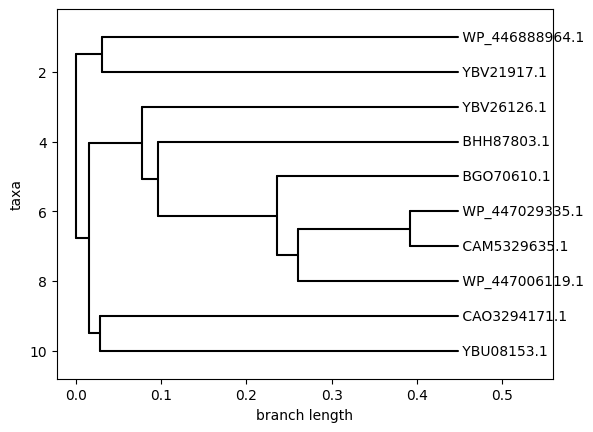

In [14]:
from Bio import Phylo
import matplotlib.pyplot as plt

Phylo.draw(tree)
plt.savefig("my_tree.png", dpi=300, bbox_inches="tight")
plt.close()


In [15]:
%matplotlib inline
from pathlib import Path
from Bio import Phylo
import matplotlib.pyplot as plt

# create an explicit figure + axes and draw onto that axes
fig = plt.figure(figsize=(12, 25))
ax = fig.add_subplot(1, 1, 1)

# draw explicitly onto our axes; do_show=False prevents Biopython from opening/creating another figure
Phylo.draw(tree, axes=ax, do_show=False, label_func=lambda n: n.name if n else "")

# force the renderer to render the figure before saving
fig.canvas.draw()

# save using the figure object (safer than plt.savefig in some notebook backends)
out = Path("my_tree.png")
fig.savefig(out, dpi=300, bbox_inches="tight")
plt.close(fig)

print(f"Saved {out} ({out.stat().st_size} bytes)")


Saved my_tree.png (187041 bytes)
